In [ ]:
import os
os.chdir('Completar con ruta absoluta del proyecto')
import models.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from models.models import ConvolutionalNeuralNetwork
import models.activations as activations
import training.optimizers as optimizers
import training.losses as losses
import utils.metrics as metrics

### CNN

In [2]:
import utils.dataset as dt

# Cargar dataset
x_train, y_train, x_test, y_test, x_val, y_val = dt.load_mnist(validation_size=0.2)

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(44800, 1, 28, 28) (44800, 10)
(14000, 1, 28, 28) (14000, 10)
(11200, 1, 28, 28) (11200, 10)


In [4]:
batch = x_train.shape[0]
x = x_train[:batch, :, :, :]
y = y_train[:batch]
c, h, w = x.shape[1:]
classes = y.shape[1]
epochs = 5
batch_size = 32

model = ConvolutionalNeuralNetwork(
    input_shape=(c, h, w),
    layers=[    
        layers.Conv2D(filters=32, filter_size=3, activation=activations.ReLU()),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(neurons=64, activation=activations.ReLU()),
        layers.Dense(neurons=classes, activation=activations.Softmax())
    ], 
    optimizer=optimizers.Adam(), 
    loss=losses.CategoricalCrossEntropy(reduction='mean'), 
    metrics=metrics.categorical_accuracy,
    verbose=True
)
model.summary()


NeuralNetwork con 6 capas:
- input: Entrada - (None, 1, 28, 28)
- conv: Conv2D - (None, 32, 26, 26) - 320 params
    Pesos:  (3, 3, 1, 32)
    Bias:  (32,)
- max_pooling: MaxPool2D - (None, 32, 13, 13)
- flatten: Flatten - (None, 5408)
- dense: Dense - (None, 64) - 346176 params
    Pesos:  (5408, 64)
    Bias:  (64,)
- dense: Dense - (None, 10) - 650 params
    Pesos:  (64, 10)
    Bias:  (10,)
Optimizador: Adam - Learning rate: 0.001
Función de pérdida: CategoricalCrossEntropy
Función de cálculo de métricas: Categorical_accuracy
Cantidad de parámetros: 347146


In [5]:
history = model.train(x, y, epochs=epochs, batch_size=batch_size)
train_loss = history['train']['loss']
train_acc = history['train']['categorical_accuracy']

Entrenando el modelo...
Epoch 1/5 - Loss: 0.1175 - categorical_accuracy: 0.96875
Epoch 2/5 - Loss: 0.1092 - categorical_accuracy: 0.96875
Epoch 3/5 - Loss: 0.1043 - categorical_accuracy: 0.96875
Epoch 4/5 - Loss: 0.1013 - categorical_accuracy: 0.96875
Epoch 5/5 - Loss: 0.0861 - categorical_accuracy: 0.96875


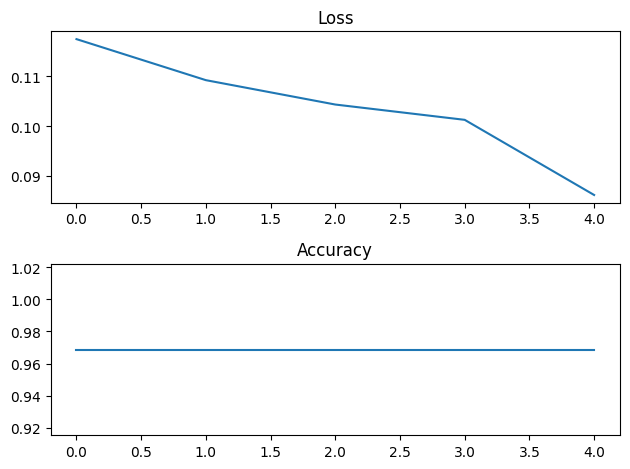

In [6]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(train_loss)
ax[0].set_title('Loss')
ax[1].plot(train_acc)
ax[1].set_title('Accuracy')
plt.tight_layout()
plt.show()

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print('Pérdida: ', loss)
print('Accuracy: ', acc)

Pérdida:  0.06186892148370555
Accuracy:  0.9812142857142857


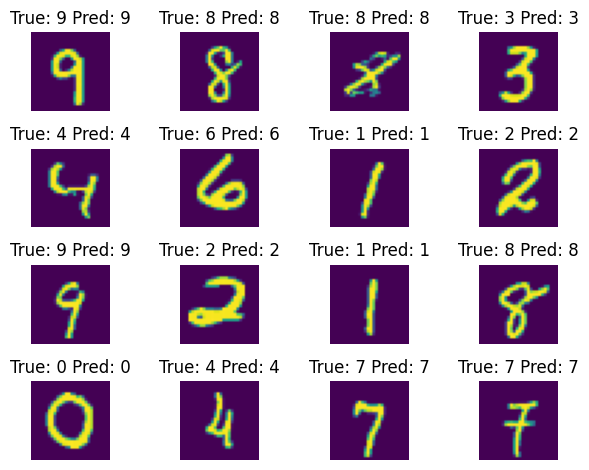

In [ ]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(x_test[i:i+1][0][0])
    true = np.argmax(y_test[i:i+1])
    pred = np.argmax(model(x_test[i:i+1]))
    plt.title(f"True: {str(true)} Pred: {str(pred)}")
plt.tight_layout()